In [118]:
import pandas as pd
import numpy as np
import seaborn as sns

In [119]:
# 데이터 불러오기
raw_welfare = pd.read_spss('Koweps_hpwc14_2019_beta2.sav')

In [120]:
# 복사본 만들기
# 이유 : 데이터 원본을 복구할 상황을 대비해 그대로 두고 복사본을 사용하기 위해서
welfare = raw_welfare.copy()

In [121]:
# 변수명 바꾸기
# 분석에 사용할 변수 6개의 이름 알아보기 쉬운 단어로 변경
welfare = welfare.rename(
    columns= {'h14_g3' : 'sex', # 성별
              'h14_g4' : 'birth', # 태어난 연도
              'h14_g10' : 'marriage_type', # 혼인 상태
              'h14_g11' : 'religion', # 종교
              'p1402_8aq1' : 'income', # 월급
              'h14_eco9' : 'code_job', # 직업 코드
              'h14_reg7' : 'code_region' # 지역 코드
              }
)

In [122]:
# [성별에 따른 월급 차이]
'''
단계
1. 변수 검토 및 전처리
1) 성별
2) 월급

2. 변수 간 관계 분석
1) 성별 월급 평균표 만들기
2) 그래프 만들기
'''

'\n단계\n1. 변수 검토 및 전처리\n1) 성별\n2) 월급\n\n2. 변수 간 관계 분석\n1) 성별 월급 평균표 만들기\n2) 그래프 만들기\n'

In [123]:
# 1. 변수 검토 및 전처리하기
# 1-1. 변수 검토
# 성별 변수 검토

# 성별 변수 타입 출력
welfare['sex'].dtypes

dtype('float64')

In [124]:
# 빈도 구하기
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [125]:
# 1-2. 전처리
# 데이터에 이상치가 있는지 검토하고, 분석할 때 편하도록 NaN을 부여해 결측 처리
# 값이 9인 경우도 성별을 알 수 없으므로 분석에서 제외해야 하므로 결측 처리

# 이상치 확인
welfare['sex'].value_counts()

sex
2.0    7913
1.0    6505
Name: count, dtype: int64

In [126]:
# 만약 이상치가 있다면?
# 이상치 결측 처리

# 코드 : np.nan -> 출력 : NaN
welfare['sex'] = np.where(welfare['sex'] == 9, np.nan, welfare['sex'])

# 결측치 확인
welfare['sex'].isna().sum()

np.int64(0)

In [127]:
# 성별 항목 이름 교체
# 성별이 숫자 1,2로 되어 있으므로 값의 의미를 이해하기 쉽도록 문자열 변경
welfare['sex'] = np.where(welfare['sex'] == 1, 'male', 'female')

# 빈도 구하기
# 실제로 문자열로 변경되었는지 궁금해서 빈도 구함
welfare['sex'].value_counts()

sex
female    7913
male      6505
Name: count, dtype: int64

<Axes: xlabel='sex', ylabel='count'>

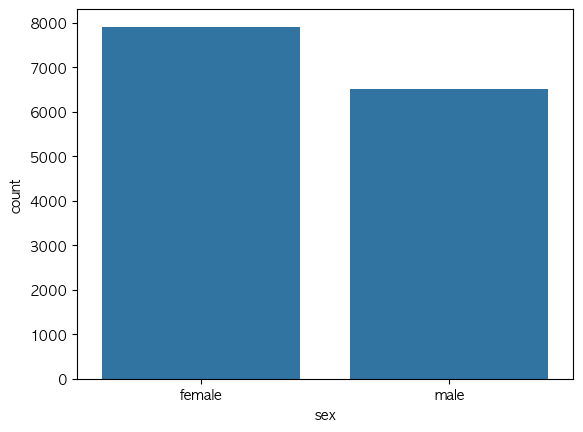

In [128]:
# 빈도 막대 그래프
sns.countplot(data=welfare, x='sex')

In [129]:
# 월급 변수 검토 및 전처리
# income(월급)
# 연속 변수 : df.describe() -> 요약 통계량

# 순서
# 1. 변수 타입 출력
# 2. 요약 통계량
# 3. 히스토그램

# 변수 타입 출력
welfare['income'].dtypes

dtype('float64')

In [130]:
# 요약 통계량
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

<Axes: xlabel='income', ylabel='Count'>

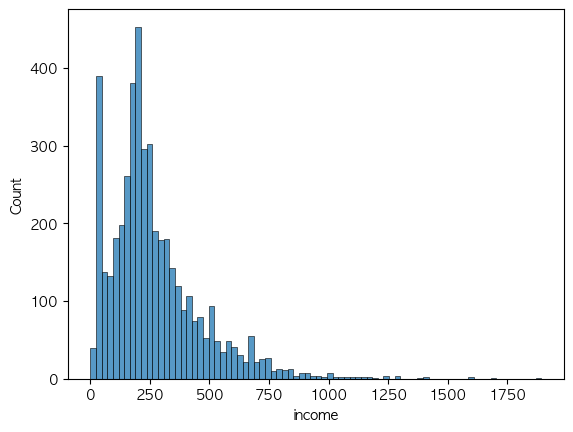

In [131]:
# 히스토그램
# sns.histplot()
sns.histplot(data=welfare, x='income')

In [132]:
# 전처리
# 이상치 확인
welfare['income'].describe()

count    4534.000000
mean      268.455007
std       198.021206
min         0.000000
25%       150.000000
50%       220.000000
75%       345.750000
max      1892.000000
Name: income, dtype: float64

In [133]:
# 결측치 확인
welfare['income'].isna().sum()

np.int64(9884)

In [134]:
# 이상치 결측치 처리
welfare['income'] = np.where(welfare['income'] == 9999, np.nan, welfare['income'])

In [135]:
# 결측치 확인
welfare['income'].isna().sum()

np.int64(9884)

In [136]:
# 성별 월급 평균표 만들기

# 순서
# income 결측치 제거
# sex별 분리
# income 평균 구하기
sex_income = welfare.dropna(subset='income')\
.groupby('sex', as_index=False)\
.agg(mean_income = ('income', 'mean'))

sex_income

,sex,mean_income
0,female,186.293096
1,male,349.037571


<Axes: xlabel='sex', ylabel='mean_income'>

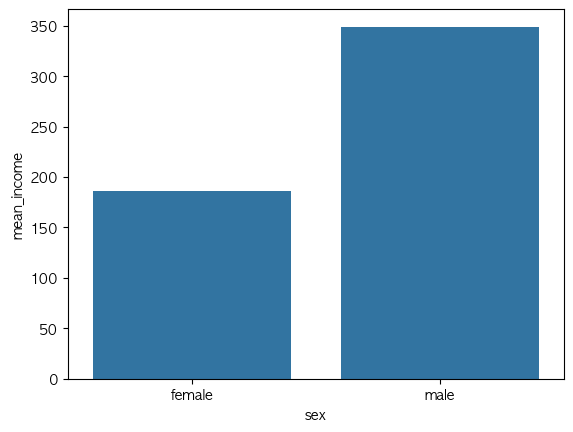

In [137]:
sns.barplot(data=sex_income, x='sex', y='mean_income')

In [138]:
# [나이와 월급의 관계]
# 태어난 연도 변수를 이용해 나이 변수를 만들어야 됨

# 데이터 타입 확인 -> 요약 통계량 -> 히스토그램
welfare['birth'].dtypes

dtype('float64')

In [139]:
welfare['birth'].describe()

count    14418.000000
mean      1969.280205
std         24.402250
min       1907.000000
25%       1948.000000
50%       1968.000000
75%       1990.000000
max       2018.000000
Name: birth, dtype: float64

<Axes: xlabel='birth', ylabel='Count'>

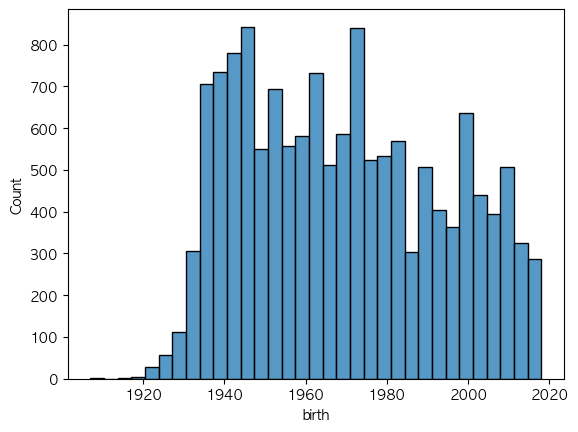

In [140]:
sns.histplot(data=welfare, x='birth')

In [141]:
# 모름/무응답 -> 코드북에 어떤 값으로 표시? -> 9999

# 전처리 과정
# 이상치 확인 -> 결측치 확인 -> 이상치 결측 처리 -> 결측치 확인
welfare['birth'].describe() # 이상치 확인

# 결측치 확인
# 0으로 나옴
welfare['birth'].isna().sum()

np.int64(0)

In [142]:
# 이상치 결측 처리
welfare['birth'] = np.where(welfare['birth'] == 9999, np.nan, welfare['birth'])

In [143]:
# 결측치 확인
welfare['birth'].isna().sum()

np.int64(0)

In [144]:
# 파생 변수(-> 나이 변수) 만들기
# 나이 변수 = 2019 - 태어난 연도 + 1
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1)
welfare['age'].describe()

count    14418.000000
mean        50.719795
std         24.402250
min          2.000000
25%         30.000000
50%         52.000000
75%         72.000000
max        113.000000
Name: age, dtype: float64

In [145]:
# 나이와 월급의 관계 분석
# 평균표 만든 뒤 선 그래프
age_income = welfare.dropna(subset='income')\
.groupby('age')\
.agg(mean_income = ('income', 'mean'))

<Axes: xlabel='age', ylabel='mean_income'>

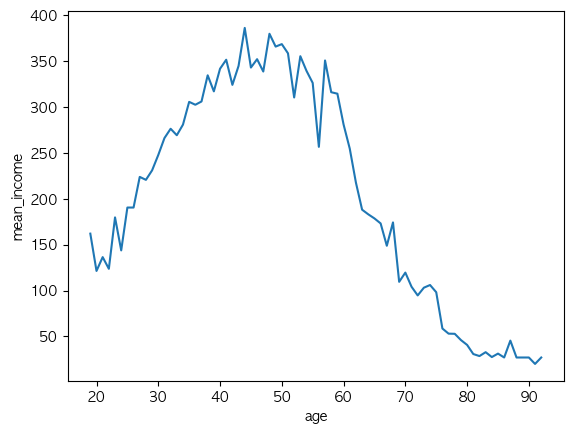

In [146]:
sns.lineplot(data=age_income, x='age', y='mean_income')

In [147]:
# [연령대에 따른 월급 차이]
# 연령대(파생 변수 생성), 월급
welfare['age'].head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [148]:
'''
초년층 : 30세 미만 -> young
중년층 : 30 ~ 59세 -> middle
노년층 : 60세 이상 -> old
'''
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59, 'middle',
                                'old')))

In [149]:
# 빈도 구하기
welfare['ageg'].value_counts()

ageg
old       5955
middle    4963
young     3500
Name: count, dtype: int64

<Axes: xlabel='ageg', ylabel='count'>

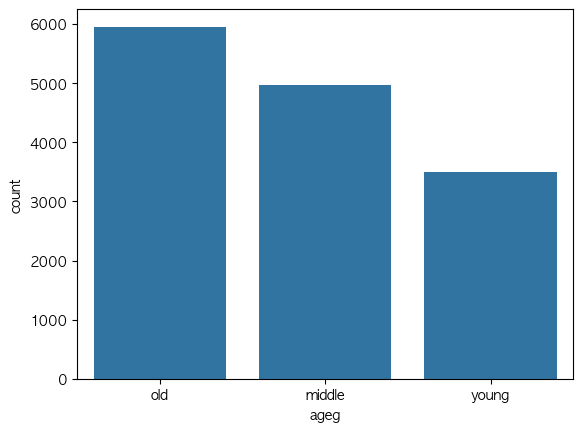

In [150]:
# 빈도 막대 그래프 만들기
sns.countplot(data=welfare, x='ageg')

In [151]:
# 연령대에 따른 월급 분석하기
# 1) 연령대별 월급 평균표 만들기
# 순서 : income 결측치 제거 -> ageg별 분리 -> income 평균표 구하기

# 중요 개념
# 결측치 제거 : 데이터프레임.dropna(subset = '결측치 제거하고 싶은 변수명')
# 특정 변수별 분리(묶어주자) : .groupby('변수명', as_index = False)
# 통계 함수 : .agg(새로운 변수명 = ('사용할 기존 변수', '함수'))
ageg_income = welfare.dropna(subset='income')\
.groupby('ageg', as_index=False)\
.agg(mean_income = ('income', 'mean'))

ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


'\n분석한 점\n중년층이 330만 원 정도로 가장 많은 월급을 받고\n노년층의 140만 원으로 초년층이 받는 월급보다 195만 원정도 작다.\n'

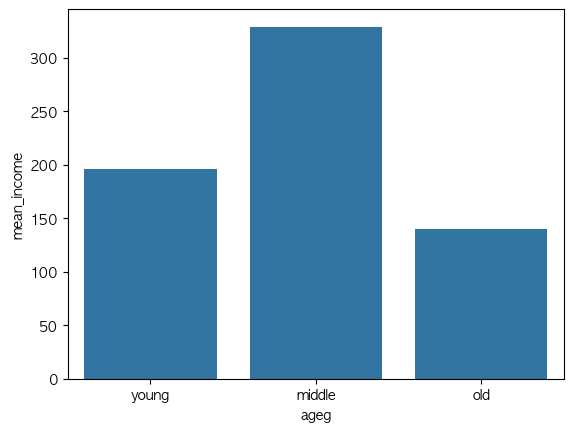

In [152]:
# 막대 그래프 만들기
# barplot()
sns.barplot(data=ageg_income, x='ageg', y='mean_income',
            order=['young', 'middle', 'old'])

# 초년, 중년, 노년층 순으로 막대 정렬

'''
분석한 점
중년층이 330만 원 정도로 가장 많은 월급을 받고
노년층의 140만 원으로 초년층이 받는 월급보다 195만 원정도 작다.
'''

In [153]:
# [연령대 및 성별 월급 차이]
# 어떤 변수 검토 및 전처리? 연령대, 성별, 월급
# 연령대 및 성별 월급 평균표 만든 뒤 그래프 만들기

# 1. 연령대 및 성별 월급 평균표 만들기
# 순서
# 1) income 결측치 제거 
# 2) ageg 및 sex별 분리
# 3) income 평균 구하기
sex_income = welfare.dropna(subset='income')\
.groupby(['ageg', 'sex'], as_index=False)\
.agg(mean_income = ('income', 'mean'))

sex_income

,ageg,sex,mean_income
0,middle,female,230.481735
1,middle,male,409.541228
2,old,female,90.228896
3,old,male,204.570231
4,young,female,189.822222
5,young,male,204.909548


<Axes: xlabel='ageg', ylabel='mean_income'>

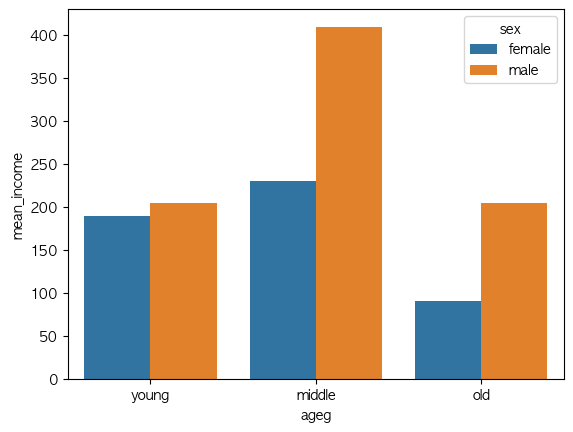

In [154]:
# 그래프 만들기
# 조건
# 막대가 연령대별로 나열
# 막대 색상이 성별에 따라 다르도록 지정
# 축 순서는 연령대 순으로 지정(young -> milld -> old)
sns.barplot(data=sex_income, x='ageg', y='mean_income', hue='sex',
            order=['young', 'middle', 'old'])

<Axes: xlabel='age', ylabel='mean_income'>

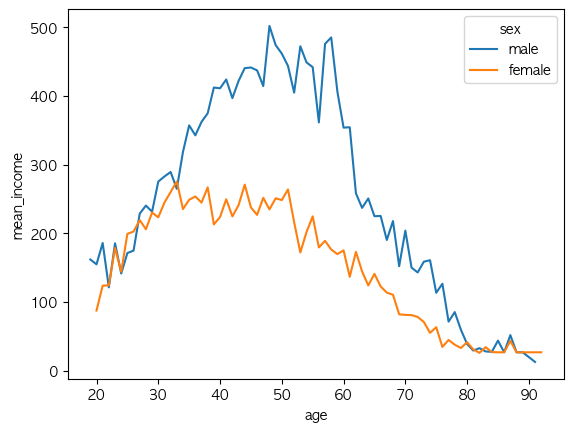

In [155]:
# [나이 및 성별 월급 차이 분석] 
# 나이 및 성별 월급 평균표
# 시계열 그래프(선 그래프) -> 조건 : 성별에 따라 선 색상이 다르도록

sex_age = welfare.dropna(subset='income')\
.groupby(['age', 'sex'], as_index= False)\
.agg(mean_income = ('income', 'mean'))

sex_age.head()

sns.lineplot(data=sex_age, x='age', y='mean_income', hue='sex')

In [156]:
# 직업별 월급 차이
# 직업 변수 검토
# 변수 검토 순서 : 데이터타입(dtypes) -> 빈도 구하기(value_counts())
welfare['code_job'].dtypes

dtype('float64')

In [157]:
welfare['code_job'].value_counts()

code_job
611.0    962
941.0    391
521.0    354
312.0    275
873.0    236
        ... 
112.0      2
784.0      2
423.0      1
861.0      1
872.0      1
Name: count, Length: 150, dtype: int64

In [158]:
# 전처리
# 코드북의 직업분류코드 목록을 이용해 직업 이름을 나타낸 변수 만들기
list_job = pd.read_excel('Koweps_Codebook_2019.xlsx', sheet_name='직종코드')
list_job.head()

,code_job,job
0,111,의회 의원∙고위 공무원 및 공공단체 임원
1,112,기업 고위 임원
2,121,행정 및 경영 지원 관리자
3,122,마케팅 및 광고∙홍보 관리자
4,131,연구∙교육 및 법률 관련 관리자


In [159]:
# df.merge() : 결합하는 함수
# welfare에 list_job 결합
welfare = welfare.merge(list_job, how='left', on='code_job')

In [160]:
# code_job 결측치 제거하고 code_job, job 출력
welfare.dropna(subset='code_job')[['code_job', 'job']].head()

,code_job,job
2,762.0,전기공
3,855.0,금속기계 부품 조립원
7,941.0,청소원 및 환경미화원
8,999.0,기타 서비스 관련 단순 종사자
14,312.0,경영 관련 사무원


In [161]:
# 직업별 월급 차이 분석
# 1. 직업별 월급 평균표 만들기
# 순서
# job(직업), income(월급)의 결측치 제거
# 직업별로 분리(묶어줌)
# 월급 평균표

job_income = welfare.dropna(subset=['job', 'income'])\
.groupby('job', as_index=False)\
.agg(mean_income = ('income', 'mean'))

job_income.head()

,job,mean_income
0,가사 및 육아 도우미,92.455882
1,간호사,265.219178
2,감정∙기술영업및중개관련종사자,391.000000
3,건물 관리원 및 검표원,168.375000
4,건설 및 광업 단순 종사자,261.975000


In [162]:
# 2. 그래프 만들기
# (1) 월급이 많은 직업
# 앞에서 만든 평균표를 월급 기준으로 내림차순 정렬하고 상위 10개만 추출
top10 = job_income.sort_values('mean_income', ascending=False).head(10)
top10

,job,mean_income
98,의료 진료 전문가,781.000000
60,법률 전문가,776.333333
140,행정 및 경영 지원 관리자,771.833333
63,보험 및 금융 관리자,734.750000
110,재활용 처리 및 소각로 조작원,688.000000
131,컴퓨터 하드웨어 및 통신공학 전문가,679.444444
24,기계∙로봇공학 기술자 및 시험원,669.166667
6,건설∙전기 및 생산 관련 관리자,603.083333
120,제관원 및 판금원,597.000000
100,의회 의원∙고위 공무원 및 공공단체 임원,580.500000


In [163]:
# 맑은 고딕 폰트 설정
import matplotlib.pyplot as plt
plt.rcParams.update({'font.family' : 'AppleGothic'})

<Axes: xlabel='mean_income', ylabel='job'>

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


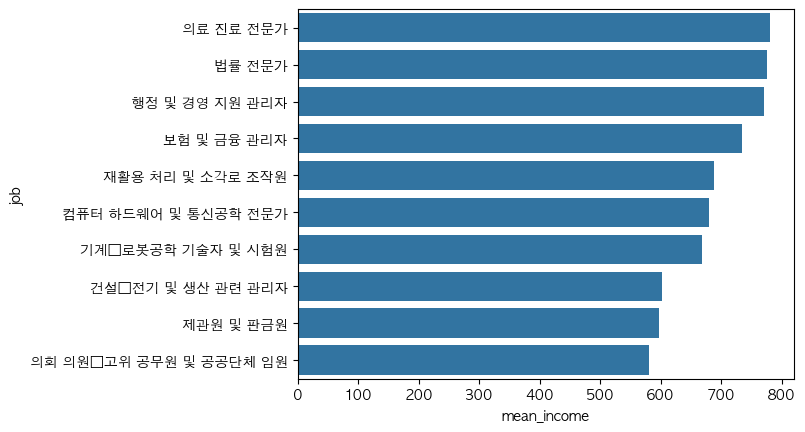

In [164]:
# 직업 이름 : y, 월급 평균 : x
sns.barplot(data=top10, y='job', x='mean_income')

In [165]:
# (2) 월급이 적은 직업
bottom10 = job_income.sort_values('mean_income').head(10)
bottom10

,job,mean_income
33,기타 돌봄∙보건 및 개인 생활 서비스 종사자,73.964286
34,기타 서비스 관련 단순 종사자,77.789474
128,청소원 및 환경미화원,88.461756
0,가사 및 육아 도우미,92.455882
43,돌봄 및 보건 서비스 종사자,117.162338
97,음식 관련 단순 종사자,118.187500
39,농림∙어업 관련 단순 종사자,122.625000
139,학예사∙사서 및 기록물 관리사,140.000000
126,채굴 및 토목 관련 기능 종사자,140.000000
135,판매 관련 단순 종사자,140.909091


[(0.0, 800.0)]

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


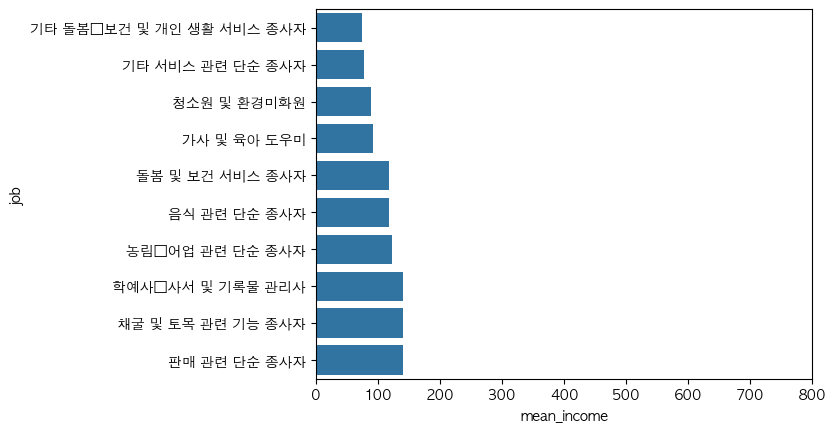

In [166]:
# x축은 0 ~ 800으로 제한
# order : 순서
# set(xlim=[0, 800])
sns.barplot(data=bottom10, y='job', x='mean_income')\
.set(xlim = [0, 800])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_2007/4180135251.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, y='job', x='mean_income', palette='viridis')\


[(0.0, 800.0)]

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


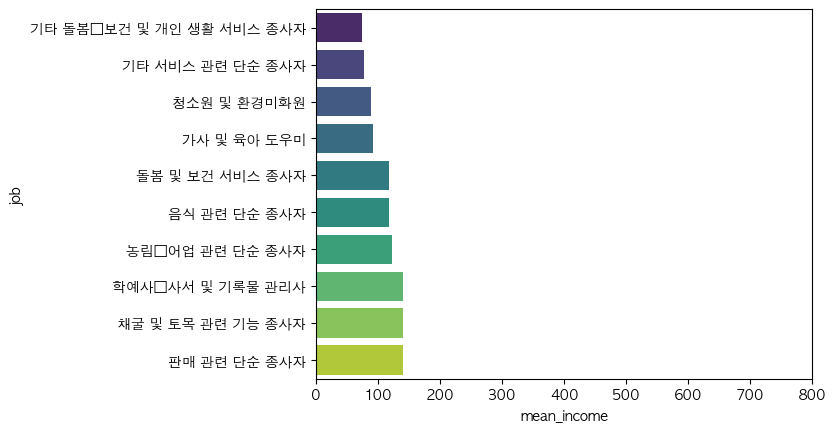

In [167]:
# 색상 다양하게 작성
sns.barplot(data=bottom10, y='job', x='mean_income', palette='viridis')\
.set(xlim = [0, 800])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_2007/852079306.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bottom10, y='job', x='mean_income', palette=colors)\


[(0.0, 800.0)]

/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  func(*args, **kwargs)
/Users/parkjihyeon/Library/Python/3.12/lib/python/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8729 (\N{BULLET OPERATOR}) missing from font(s) AppleGothic.
  fig.canvas.print_figure(bytes_io, **kw)


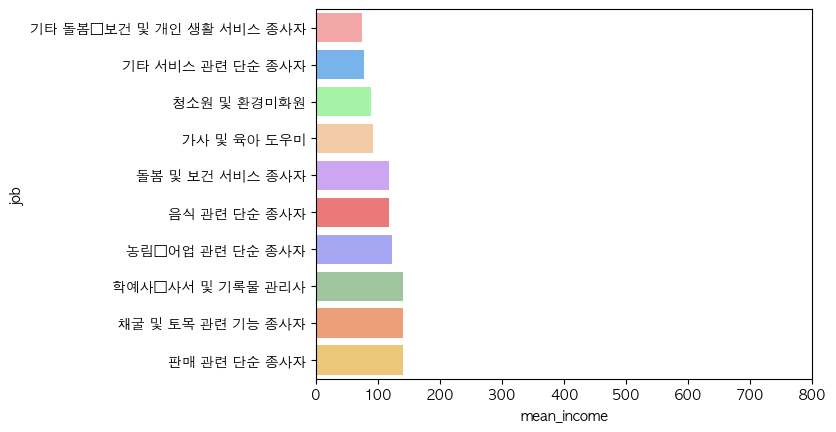

In [168]:
# 커스텀 색상
colors = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#CC99FF', '#FF6666', '#9999FF', '#99CC99', '#FF9966', '#FFCC66']

sns.barplot(data=bottom10, y='job', x='mean_income', palette=colors)\
    .set(xlim=[0, 800])

In [169]:
# 성별 직업 빈도
# 1. 성별 직업 빈도표 만들기

# 남성 직업 빈도 상위 10개 추출
# 순서
# 1. job 결측치 제거
# 2. male 추출
# 3. job별 분리
# 4. job 빈도 구하기
# 5. 내림 차순 정렬
# 6. 상위 10행 추출

job_male = welfare.dropna(subset='job')\
.query('sex == "male"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

job_male

,job,n
107,작물 재배 종사자,486
104,자동차 운전원,230
11,경영 관련 사무원,216
46,매장 판매 종사자,142
89,영업 종사자,113
127,청소원 및 환경미화원,109
4,건설 및 광업 단순 종사자,96
120,제조 관련 단순 종사자,80
3,건물 관리원 및 검표원,79
141,행정 사무원,74


In [170]:
# 여성 직업 빈도 상위 10개 추출
job_female = welfare.dropna(subset='job')\
.query('sex == "female"')\
.groupby('job', as_index=False)\
.agg(n=('job', 'count'))\
.sort_values('n', ascending=False)\
.head(10)

job_female

,job,n
83,작물 재배 종사자,476
91,청소원 및 환경미화원,282
33,매장 판매 종사자,212
106,회계 및 경리 사무원,163
31,돌봄 및 보건 서비스 종사자,155
87,제조 관련 단순 종사자,148
73,음식 관련 단순 종사자,126
58,식음료 서비스 종사자,117
88,조리사,114
24,기타 서비스 관련 단순 종사자,97


[(0.0, 500.0)]

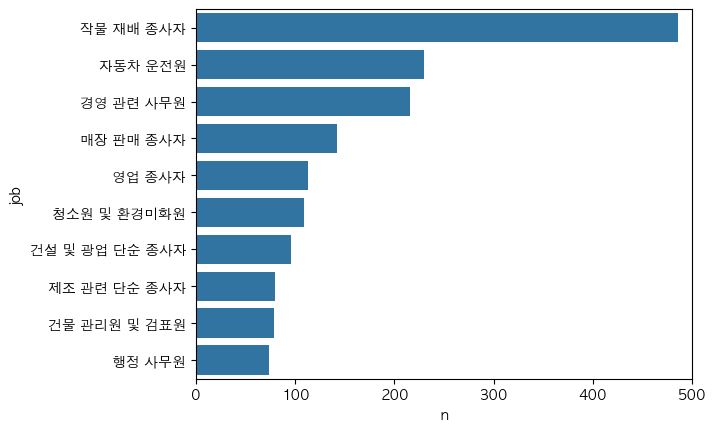

In [171]:
# 그래프
# 여성, 남성 두 그래프를 비교 -> x축의 범위 : 0 ~ 500으로 통일

# 남성 직업 빈도 막대 그래프 만들기
# 가로로된 막대 그래프
sns.barplot(data=job_male, y='job', x='n').set(xlim=[0, 500])

/var/folders/qs/7vwz223x7fzd_mmkph5ssmjm0000gn/T/ipykernel_2007/2846765056.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=job_female, y='job', x='n', palette='viridis').set(xlim=[0, 500])


[(0.0, 500.0)]

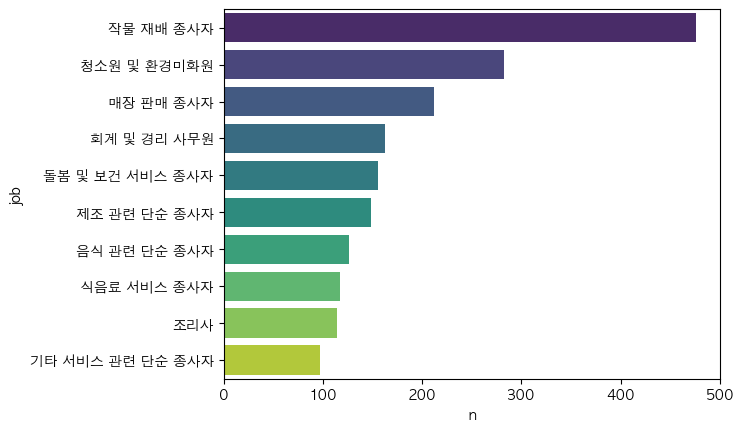

In [172]:
# 여성 직업 빈도 막대 그래프 만들기
sns.barplot(data=job_female, y='job', x='n', palette='viridis').set(xlim=[0, 500])

In [173]:
# 종교 유무에 따른 이혼율
# religion 변수 검토 : 데이터 타입 -> 빈도
welfare['religion'].dtypes

dtype('float64')

In [174]:
welfare['religion'].value_counts()

religion
2.0    7815
1.0    6603
Name: count, dtype: int64

In [175]:
# 값의 의미를 이해할 수 있도록 변수 변경
# 1이면 yes, 2이면 no
# 실제로 변경되었는지도 확인
# 종교 유무 이름 부여
welfare['religion'] = np.where(welfare['religion'] == 1, 'yes', 'no')

# 빈도 구하기
welfare['religion'].value_counts()

religion
no     7815
yes    6603
Name: count, dtype: int64

<Axes: xlabel='religion', ylabel='count'>

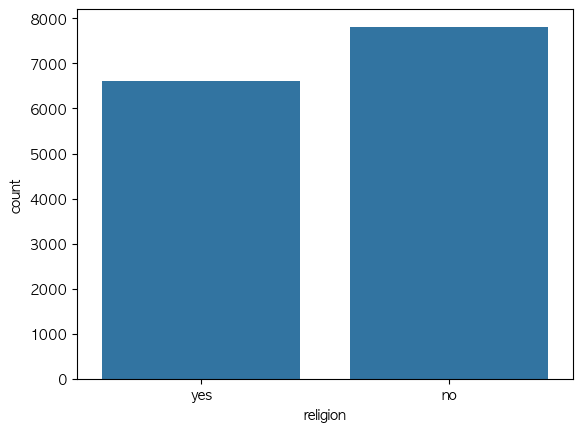

In [176]:
# 빈도 막대 그래프(countplot) 만들기
sns.countplot(data=welfare, x='religion')


In [178]:
# 혼인 상태 변수 : marriage_type
welfare['marriage_type'].dtypes
welfare['marriage_type'].value_counts()

marriage_type
1.0    7190
5.0    2357
0.0    2121
2.0    1954
3.0     689
4.0      78
6.0      29
Name: count, dtype: int64

In [179]:
# 배우자가 있으면 1, 이혼했으면 3
# 1 marriage, 3 divorce, 이 값들을 제외하고 나머지 값 etc
'''
형식
np.where(조건1, 조건1의 결과,
np.whre(조건2, 조건2의 결과,
'조건3의 결과'))
'''
welfare['marriage'] = np.where(welfare['marriage_type'] == 1, 'marriage',
                    np.where(welfare['marriage_type'] == 3, 'divorce',
                               'etc'))

In [181]:
# 이혼 여부별 빈도표
# 순서
# marriage별 분리
# marriage별 빈도 구하기
n_divorce = welfare.groupby('marriage', as_index=False)\
.agg(n= ('marriage', 'count'))

n_divorce

,marriage,n
0,divorce,689
1,etc,6539
2,marriage,7190


<Axes: xlabel='marriage', ylabel='n'>

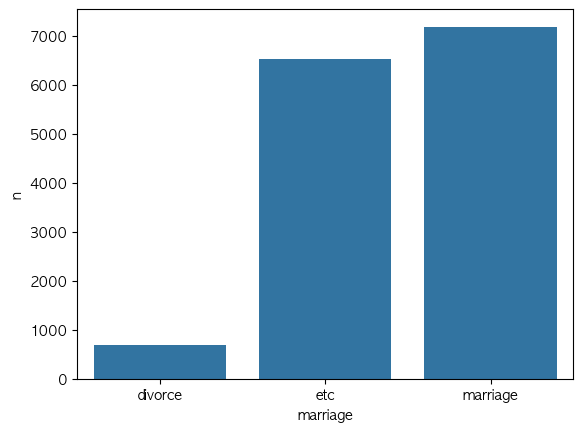

In [182]:
# 빈도 막대 그래프 만들기
sns.barplot(data=n_divorce, x='marriage', y='n')

In [184]:
# 종교 우무에 따른 이혼율표 만들기
# marriage가 etc인 경우를 제외하고 만들자.


rel_div = welfare.query('marriage != "etc"')\
.groupby('religion', as_index=False)['marriage']\
.value_counts(normalize=True)

rel_div


,religion,marriage,proportion
0,no,marriage,0.905045
1,no,divorce,0.094955
2,yes,marriage,0.920469
3,yes,divorce,0.079531
